<a href="https://colab.research.google.com/github/ByeongKeun/Industrial-AI/blob/master/2021_1_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%A0%9C/%EA%B3%BC%EC%A0%9C/2021_0531_13%EC%A3%BC%EC%B0%A8-CNNvsLENET5/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 53s - loss: 0.1986 - accuracy: 0.9395 - val_loss: 0.0510 - val_accuracy: 0.9824
Epoch 2/30
469/469 - 53s - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0385 - val_accuracy: 0.9871
Epoch 3/30
469/469 - 53s - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.0291 - val_accuracy: 0.9899
Epoch 4/30
469/469 - 52s - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0319 - val_accuracy: 0.9901
Epoch 5/30
469/469 - 53s - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 6/30
469/469 - 52s - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0303 - val_accuracy: 0.9901
Epoch 7/30
469/469 - 52s - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 8/30
469/469 - 52s - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0297 - val_accuracy: 0.9914
Epoch 9/30
469/469 - 52s - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 10/30
469/469 - 52s 

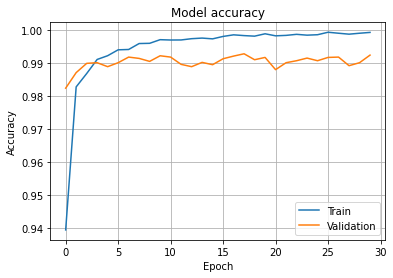

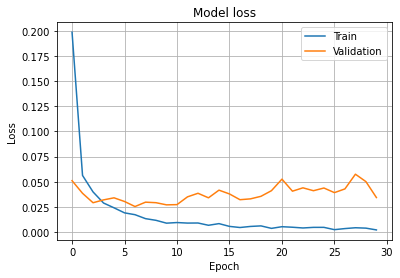

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계 (7개 층)
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1))) # Input(28 * 28) → ①Conv층: Filter Size 6, 커널(마스크) size 5*5, 활성화 함수 = relu
cnn.add(MaxPooling2D(pool_size=(2,2)))  #②Pooling층: 해상도를 절반으로 낮춤
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))  #③Conv층: Filter 16, 커널 5*5, 활성화 함수 = relu
cnn.add(MaxPooling2D(pool_size=(2,2)))  #④Pooling층: 해상도를 절반으로 낮춤
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu')) #⑤Conv층: Filter 16, 커널 5*5, 활성화 함수 = relu
cnn.add(Flatten())  #1차원 배열로 flatten
#FC층을 Dense layer로 효율화 함: 감소된 차원의 Feature(특징) Map들만 Input으로 하여 Output과 완전연결 계층을 생성
cnn.add(Dense(84,activation='relu')) #⑥ FC(DENSE) 층: size 84, 활성화 함수 relu
#첫번째 FC(DENSE) size 10, 활성화 함수 softmax
cnn.add(Dense(10,activation='softmax')) #⑦ FC(DENSE) 층: size 84, 활성화 함수 softmax

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()